In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as pyplot
%matplotlib inline

In [3]:
churn_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn_data.T

,0,1,2,3,4,5,6,7,8,9,...,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK,6713-OKOMC,7892-POOKP,6388-TABGU,...,9767-FFLEM,0639-TSIQW,8456-QDAVC,7750-EYXWZ,2569-WGERO,6840-RESVB,2234-XADUH,4801-JZAZL,8361-LTMKD,3186-AJIEK
gender,Female,Male,Male,Male,Female,Female,Male,Female,Female,Male,...,Male,Female,Male,Female,Female,Male,Female,Female,Male,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
Partner,Yes,No,No,No,No,No,No,No,Yes,No,...,No,No,No,No,No,Yes,Yes,Yes,Yes,No
Dependents,No,No,No,No,No,No,Yes,No,No,Yes,...,No,No,No,No,No,Yes,Yes,Yes,No,No
tenure,1,34,2,45,2,8,22,10,28,62,...,38,67,19,12,72,24,72,11,4,66
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,...,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes,No phone service,Yes,No,...,No,Yes,No,No phone service,No,Yes,Yes,No phone service,Yes,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic,DSL,...,Fiber optic,Fiber optic,Fiber optic,DSL,No,DSL,Fiber optic,DSL,Fiber optic,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No,No,No,Yes,No,Yes,...,No,Yes,No,No,No internet service,Yes,No,Yes,No,Yes


In [4]:
len(churn_data)

7043

In [5]:
churn_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
for column in churn_data:
    print(column,": ", churn_data[column].unique())

customerID :  ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender :  ['Female' 'Male']
SeniorCitizen :  [0 1]
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
tenure :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No phone service' 'No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes' 'No internet service']
OnlineBackup :  ['Yes' 'No' 'No internet service']
DeviceProtection :  ['No' 'Yes' 'No internet service']
TechSupport :  ['No' 'Yes' 'No internet service']
StreamingTV :  ['No' 'Yes' 'No internet service']
StreamingMovies :  ['No' 'Yes' 'No internet service']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mail

In [7]:
total_charges = pd.to_numeric(churn_data.TotalCharges, errors='coerce')

In [8]:
churn_data[total_charges.isnull()][['customerID','TotalCharges']]

,customerID,TotalCharges
488,4472-LVYGI,
753,3115-CZMZD,
936,5709-LVOEQ,
1082,4367-NUYAO,
1340,1371-DWPAZ,
3331,7644-OMVMY,
3826,3213-VVOLG,
4380,2520-SGTTA,
5218,2923-ARZLG,
6670,4075-WKNIU,


In [9]:
churn_data.TotalCharges = pd.to_numeric(churn_data.TotalCharges, errors='coerce')
churn_data.TotalCharges = churn_data.TotalCharges.fillna(0)

In [10]:
churn_data.columns = churn_data.columns.str.lower().str.replace(" ", "_")
string_columns = list(churn_data.dtypes[churn_data.dtypes == 'object'].index)
for col in string_columns:
    churn_data[col] = churn_data[col].str.lower().str.replace(" ", "_")

In [11]:
del churn_data['customerid']

I set the features with only "yes" or "no" as 1 or 0.

In [12]:
churn_data.churn = (churn_data.churn == 'yes').astype(int)
churn_data.partner = (churn_data.partner == 'yes').astype(int)
churn_data.dependents = (churn_data.dependents == 'yes').astype(int)
churn_data.phoneservice = (churn_data.phoneservice == 'yes').astype(int)
churn_data.paperlessbilling = (churn_data.paperlessbilling == 'yes').astype(int)

In [13]:
churn_data

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,female,0,1,0,1,0,no_phone_service,dsl,no,yes,no,no,no,no,month-to-month,1,electronic_check,29.85,29.85,0
1,male,0,0,0,34,1,no,dsl,yes,no,yes,no,no,no,one_year,0,mailed_check,56.95,1889.50,0
2,male,0,0,0,2,1,no,dsl,yes,yes,no,no,no,no,month-to-month,1,mailed_check,53.85,108.15,1
3,male,0,0,0,45,0,no_phone_service,dsl,yes,no,yes,yes,no,no,one_year,0,bank_transfer_(automatic),42.30,1840.75,0
4,female,0,0,0,2,1,no,fiber_optic,no,no,no,no,no,no,month-to-month,1,electronic_check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,male,0,1,1,24,1,yes,dsl,yes,no,yes,yes,yes,yes,one_year,1,mailed_check,84.80,1990.50,0
7039,female,0,1,1,72,1,yes,fiber_optic,no,yes,yes,no,yes,yes,one_year,1,credit_card_(automatic),103.20,7362.90,0
7040,female,0,1,1,11,0,no_phone_service,dsl,yes,no,no,no,no,no,month-to-month,1,electronic_check,29.60,346.45,0
7041,male,1,1,0,4,1,yes,fiber_optic,no,no,no,no,no,no,month-to-month,1,mailed_check,74.40,306.60,1


In [32]:
from sklearn.model_selection import train_test_split
churn_train_full, churn_test = train_test_split(churn_data, test_size=0.2, random_state=1)
cols = list(churn_train_full.columns)
cols

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'tenure',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'monthlycharges',
 'totalcharges',
 'churn']

In [15]:
churn_train, churn_val = train_test_split(churn_train_full, test_size=0.5, random_state=11)

In [16]:
y_train = churn_train.churn.values
y_val = churn_train.churn.values

In [17]:
del churn_train['churn']
del churn_val['churn']

##### Exploratory Data Analysis

In [18]:
churn_train_full.isnull().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [19]:
churn_train_full.churn.value_counts()

0    4113
1    1521
Name: churn, dtype: int64

In [20]:
global_mean = churn_train_full.churn.mean()
round(global_mean, 3)

0.27

In [21]:
churn_train_full.nunique()

gender                 2
seniorcitizen          2
partner                2
dependents             2
tenure                73
phoneservice           2
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
paperlessbilling       2
paymentmethod          4
monthlycharges      1494
totalcharges        5291
churn                  2
dtype: int64

feature selection

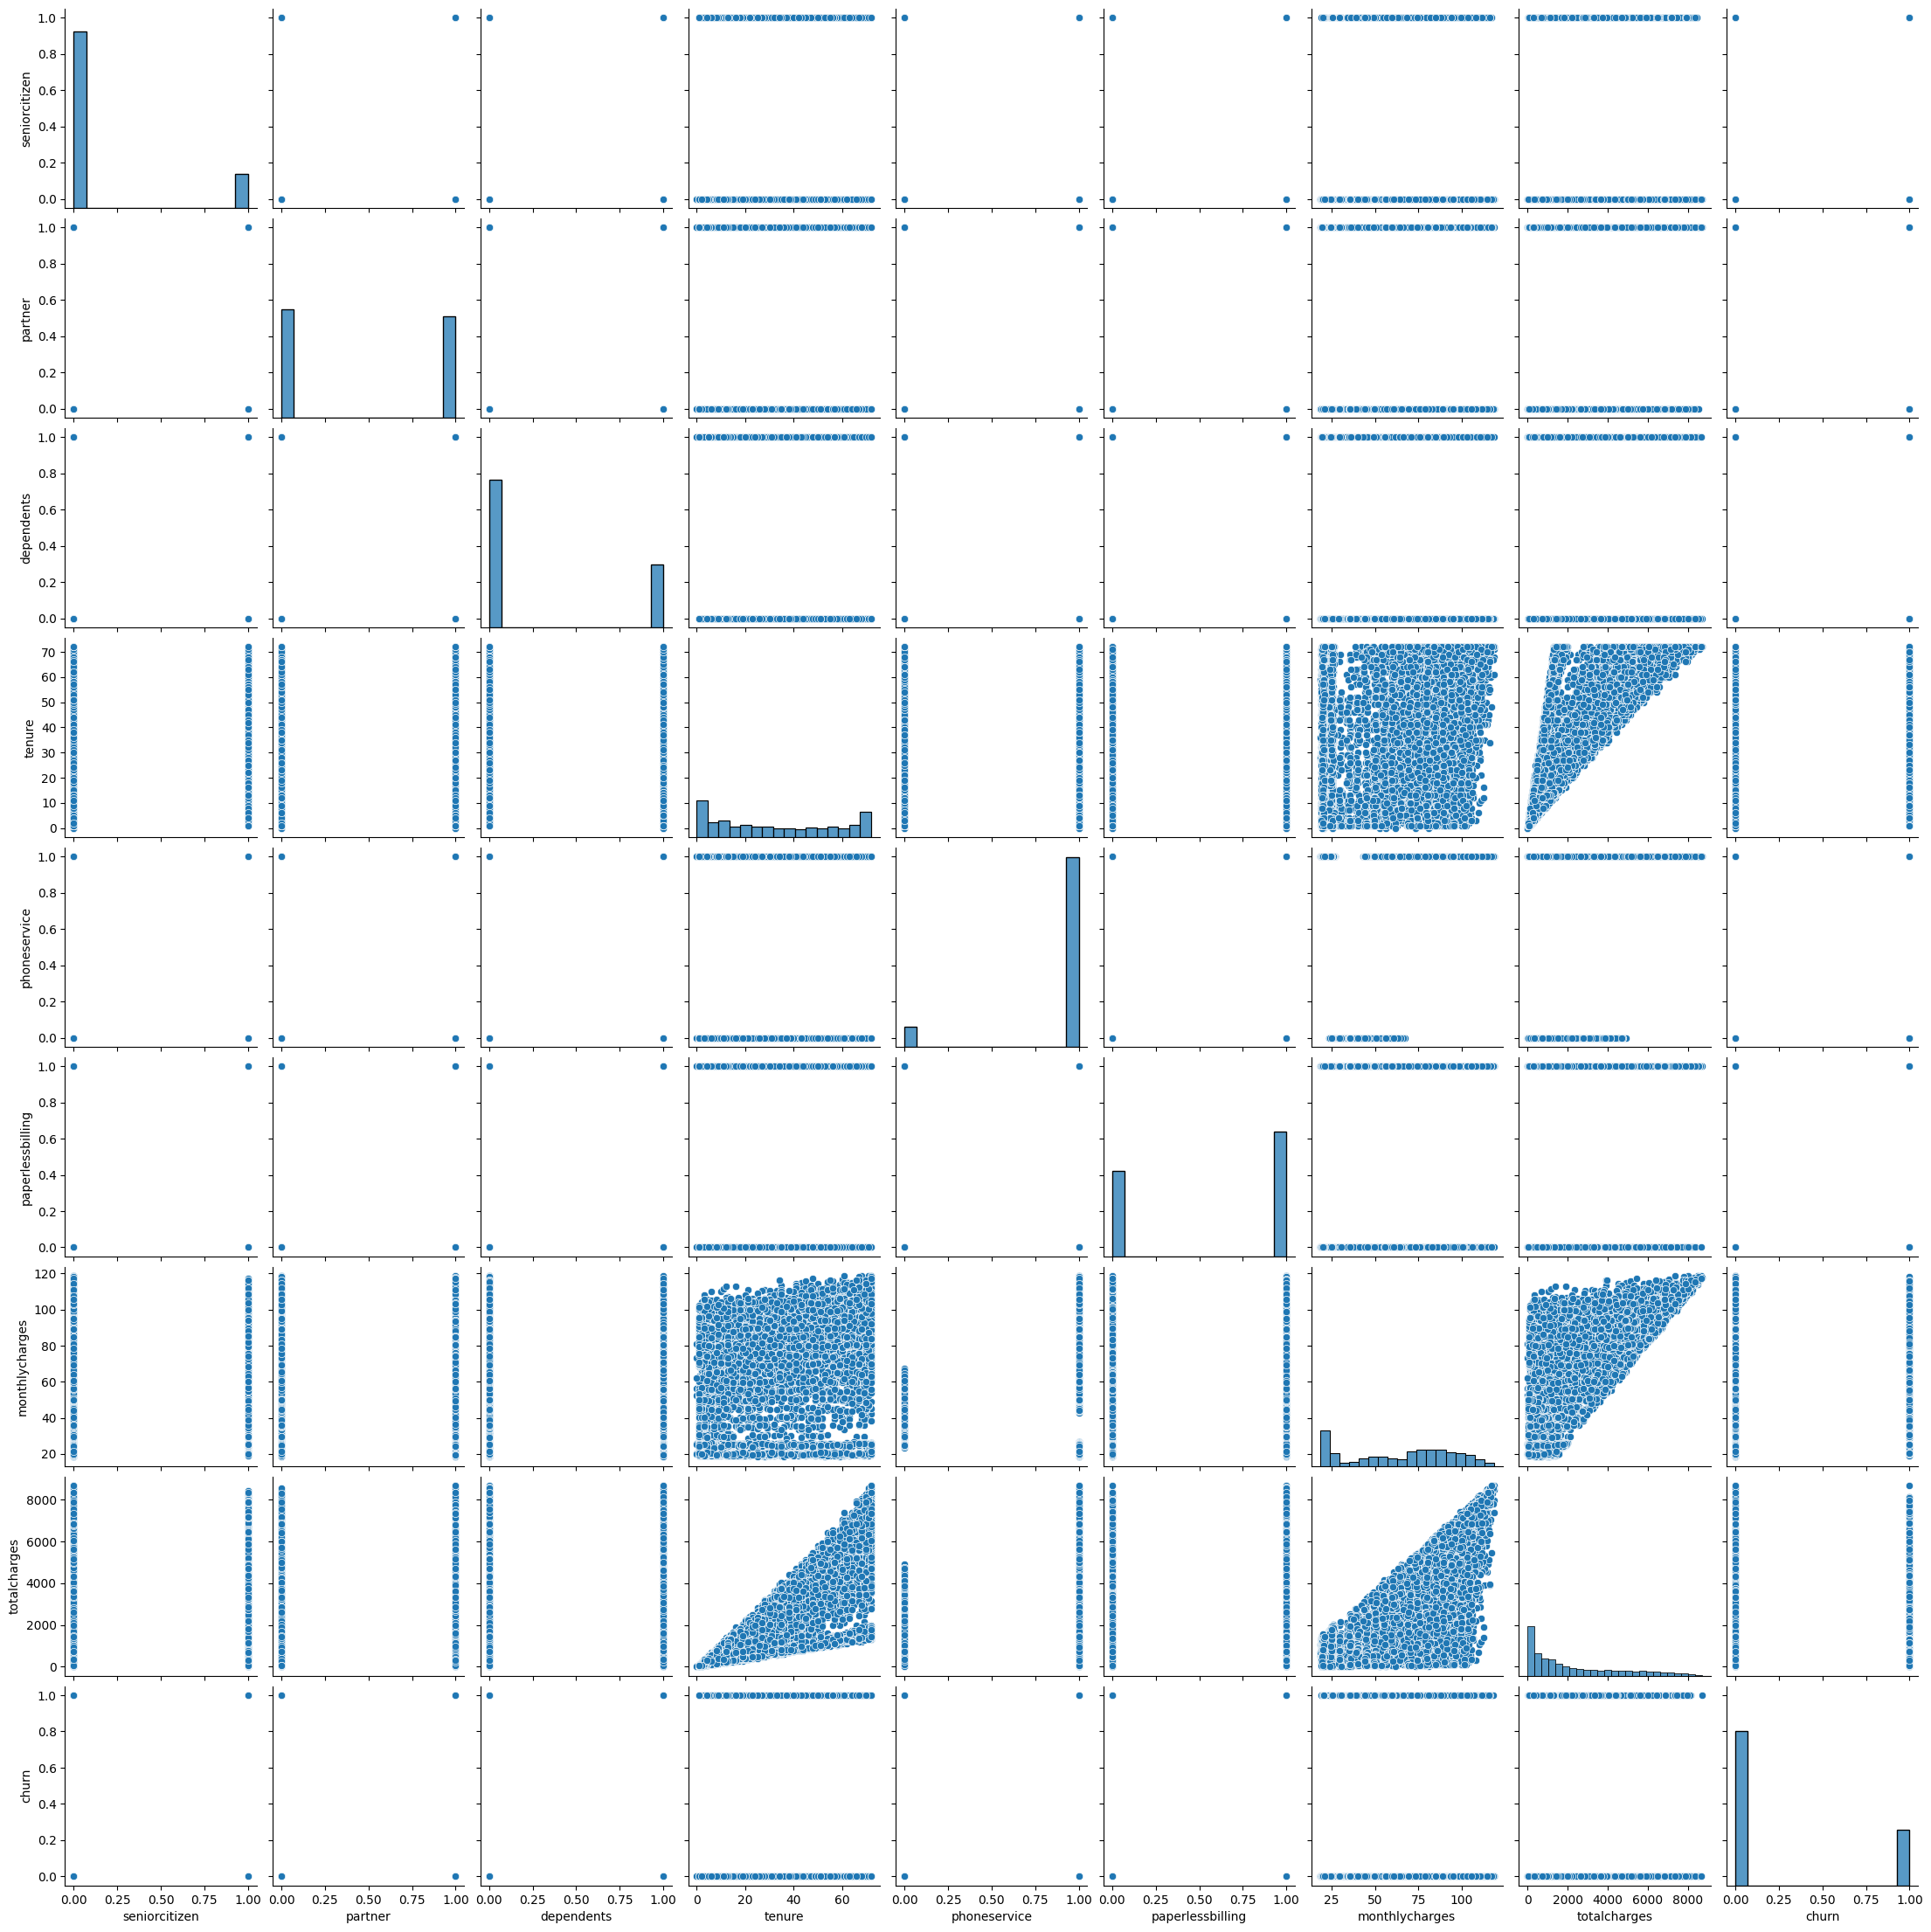

In [22]:
sns.pairplot(churn_data)

In [23]:
churn_data.corr()

/tmp/ipykernel_5765/4257871518.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  churn_data.corr()


,seniorcitizen,partner,dependents,tenure,phoneservice,paperlessbilling,monthlycharges,totalcharges,churn
seniorcitizen,1.000000,0.016479,-0.211185,0.016567,0.008576,0.156530,0.220173,0.103006,0.150889
partner,0.016479,1.000000,0.452676,0.379697,0.017706,-0.014877,0.096848,0.317504,-0.150448
dependents,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.111377,-0.113890,0.062078,-0.164221
tenure,0.016567,0.379697,0.159712,1.000000,0.008448,0.006152,0.247900,0.826178,-0.352229
phoneservice,0.008576,0.017706,-0.001762,0.008448,1.000000,0.016505,0.247398,0.113214,0.011942
paperlessbilling,0.156530,-0.014877,-0.111377,0.006152,0.016505,1.000000,0.352150,0.158574,0.191825
monthlycharges,0.220173,0.096848,-0.113890,0.247900,0.247398,0.352150,1.000000,0.651174,0.193356
totalcharges,0.103006,0.317504,0.062078,0.826178,0.113214,0.158574,0.651174,1.000000,-0.198324
churn,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.191825,0.193356,-0.198324,1.000000


In [24]:
female_mean = churn_train_full[churn_train_full.gender == 'female'].churn.mean()
male_mean = churn_train_full[churn_train_full.gender == 'male'].churn.mean()
print("female:", round(female_mean, 3), "\nmale:", round(male_mean, 3))

female: 0.277 
male: 0.263


In [25]:
partner_yes = churn_train_full[churn_train_full.partner == 1].churn.mean()
partner_no = churn_train_full[churn_train_full.partner == 0].churn.mean()
print("has partner:", round(partner_yes, 3), "\nno partner:", round(partner_no, 3))

has partner: 0.205 
no partner: 0.33


Calculate risks

In [26]:
for col in churn_train_full:
    df_group = churn_train_full.groupby(by=col).churn.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['rate'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,rate
gender,,,
female,0.276824,0.006856,1.025396
male,0.263214,-0.006755,0.974980


,mean,diff,rate
seniorcitizen,,,
0,0.242270,-0.027698,0.897403
1,0.413377,0.143409,1.531208


,mean,diff,rate
partner,,,
0,0.329809,0.059841,1.221659
1,0.205033,-0.064935,0.759472


,mean,diff,rate
dependents,,,
0,0.313760,0.043792,1.162212
1,0.165666,-0.104302,0.613651


,mean,diff,rate
tenure,,,
0,0.000000,-0.269968,0.000000
1,0.635052,0.365083,2.352321
2,0.520619,0.250651,1.928445
3,0.448485,0.178517,1.661252
4,0.493151,0.223183,1.826700
...,...,...,...
68,0.102564,-0.167404,0.379912
69,0.092105,-0.177863,0.341171
70,0.125000,-0.144968,0.463018


,mean,diff,rate
phoneservice,,,
0,0.241316,-0.028652,0.893870
1,0.273049,0.003081,1.011412


,mean,diff,rate
multiplelines,,,
no,0.257407,-0.012561,0.953474
no_phone_service,0.241316,-0.028652,0.893870
yes,0.290742,0.020773,1.076948


,mean,diff,rate
internetservice,,,
dsl,0.192347,-0.077621,0.712482
fiber_optic,0.425171,0.155203,1.574895
no,0.077805,-0.192163,0.288201


,mean,diff,rate
onlinesecurity,,,
no,0.420921,0.150953,1.559152
no_internet_service,0.077805,-0.192163,0.288201
yes,0.153226,-0.116742,0.567570


,mean,diff,rate
onlinebackup,,,
no,0.404323,0.134355,1.497672
no_internet_service,0.077805,-0.192163,0.288201
yes,0.217232,-0.052736,0.804660


,mean,diff,rate
deviceprotection,,,
no,0.395875,0.125907,1.466379
no_internet_service,0.077805,-0.192163,0.288201
yes,0.230412,-0.039556,0.853480


,mean,diff,rate
techsupport,,,
no,0.418914,0.148946,1.551717
no_internet_service,0.077805,-0.192163,0.288201
yes,0.159926,-0.110042,0.592390


,mean,diff,rate
streamingtv,,,
no,0.342832,0.072864,1.269897
no_internet_service,0.077805,-0.192163,0.288201
yes,0.302723,0.032755,1.121328


,mean,diff,rate
streamingmovies,,,
no,0.338906,0.068938,1.255358
no_internet_service,0.077805,-0.192163,0.288201
yes,0.307273,0.037305,1.138182


,mean,diff,rate
contract,,,
month-to-month,0.431701,0.161733,1.599082
one_year,0.120573,-0.149395,0.446621
two_year,0.028274,-0.241694,0.104730


,mean,diff,rate
paperlessbilling,,,
0,0.172071,-0.097897,0.637375
1,0.338151,0.068183,1.252560


,mean,diff,rate
paymentmethod,,,
bank_transfer_(automatic),0.168171,-0.101797,0.622928
credit_card_(automatic),0.164339,-0.105630,0.608733
electronic_check,0.455890,0.185922,1.688682
mailed_check,0.193870,-0.076098,0.718121


,mean,diff,rate
monthlycharges,,,
18.25,0.0,-0.269968,0.000000
18.40,0.0,-0.269968,0.000000
18.55,0.0,-0.269968,0.000000
18.70,0.0,-0.269968,0.000000
18.75,0.0,-0.269968,0.000000
...,...,...,...
117.80,1.0,0.730032,3.704142
118.20,0.0,-0.269968,0.000000
118.35,1.0,0.730032,3.704142


,mean,diff,rate
totalcharges,,,
0.00,0.0,-0.269968,0.000000
18.80,0.0,-0.269968,0.000000
18.85,0.5,0.230032,1.852071
18.90,0.0,-0.269968,0.000000
19.00,0.0,-0.269968,0.000000
...,...,...,...
8547.15,0.0,-0.269968,0.000000
8564.75,0.0,-0.269968,0.000000
8594.40,0.0,-0.269968,0.000000


,mean,diff,rate
churn,,,
0,0.0,-0.269968,0.000000
1,1.0,0.730032,3.704142


In [38]:
churn_train_full.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1814,male,0,1,1,12,1,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,0,mailed_check,19.70,258.35,0
5946,female,0,0,0,42,1,no,dsl,yes,yes,yes,yes,no,yes,one_year,0,credit_card_(automatic),73.90,3160.55,1
3881,male,0,1,0,71,1,yes,dsl,yes,yes,no,yes,no,no,two_year,0,bank_transfer_(automatic),65.15,4681.75,0
2389,male,0,1,1,71,1,yes,dsl,yes,no,yes,yes,yes,yes,one_year,0,electronic_check,85.45,6300.85,0
3676,male,0,0,0,30,1,no,dsl,yes,yes,no,yes,yes,no,one_year,0,electronic_check,70.40,2044.75,0


In [44]:
categorical = ['gender','multiplelines','internetservice','onlinesecurity','onlinebackup','deviceprotection','techsupport','streamingtv','streamingmovies','contract','paymentmethod']
numerical = ['tenure','monthlycharges','totalcharges','seniorcitizen','partner','dependents','phoneservice','paperlessbilling']

from sklearn.metrics import mutual_info_score

def calculate_mi(series):
    return mutual_info_score(series, churn_train_full.churn)

df_mi = churn_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
multiplelines,0.000857


In [45]:
churn_train_full[numerical].corrwith(churn_train_full.churn)

tenure             -0.351885
monthlycharges      0.196805
totalcharges       -0.196353
seniorcitizen       0.141966
partner            -0.140414
dependents         -0.152236
phoneservice        0.021163
paperlessbilling    0.184033
dtype: float64

In [49]:
from sklearn.feature_extraction import DictVectorizer

train_dict = churn_train[categorical + numerical].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [50]:
X_train = dv.transform(train_dict)

In [51]:
X_train[0]

array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 8.5800e+01, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+01,
       1.7275e+03])

In [53]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents', 'deviceprotection=no',
       'deviceprotection=no_internet_service', 'deviceprotection=yes',
       'gender=female', 'gender=male', 'internetservice=dsl',
       'internetservice=fiber_optic', 'internetservice=no',
       'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling', 'partner',
       'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice', 'seniorcitizen', 'streamingmovies=no',
       'streamingmovies=no_internet_service', 'streamingmovies=yes',
       'streamingtv=no', 'streamingtv=no_internet_service',
     

In [57]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = 'liblinear', random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [58]:
val_dict = churn_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [60]:
y_pred = model.predict_proba(X_val)

In [61]:
y_pred = model.predict_proba(X_val)[:,1]

In [63]:
y_pred >= 0.5

array([False, False, False, ..., False,  True, False])

In [64]:
churn = y_pred >= 0.5

In [65]:
(y_val == churn).mean()

0.6130635427760028

In [67]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.564,
 'contract=one_year': 0.068,
 'contract=two_year': -0.794,
 'dependents': -0.096,
 'deviceprotection=no': 0.088,
 'deviceprotection=no_internet_service': -0.135,
 'deviceprotection=yes': -0.116,
 'gender=female': -0.067,
 'gender=male': -0.095,
 'internetservice=dsl': -0.439,
 'internetservice=fiber_optic': 0.412,
 'internetservice=no': -0.135,
 'monthlycharges': -0.001,
 'multiplelines=no': -0.189,
 'multiplelines=no_phone_service': 0.119,
 'multiplelines=yes': -0.092,
 'onlinebackup=no': 0.109,
 'onlinebackup=no_internet_service': -0.135,
 'onlinebackup=yes': -0.136,
 'onlinesecurity=no': 0.22,
 'onlinesecurity=no_internet_service': -0.135,
 'onlinesecurity=yes': -0.247,
 'paperlessbilling': 0.378,
 'partner': 0.0,
 'paymentmethod=bank_transfer_(automatic)': -0.018,
 'paymentmethod=credit_card_(automatic)': -0.149,
 'paymentmethod=electronic_check': 0.116,
 'paymentmethod=mailed_check': -0.11,
 'phoneservice': -0.281,
 'seniorcitizen': 0.326,
 'stre

#### Use model

In [68]:
churn_train_full.head(3)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
1814,male,0,1,1,12,1,no,no,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,0,mailed_check,19.70,258.35,0
5946,female,0,0,0,42,1,no,dsl,yes,yes,yes,yes,no,yes,one_year,0,credit_card_(automatic),73.90,3160.55,1
3881,male,0,1,0,71,1,yes,dsl,yes,yes,no,yes,no,no,two_year,0,bank_transfer_(automatic),65.15,4681.75,0


I have customized my own customer (me) and predicted the churn probability

In [69]:
customer = {'gender':'male', 
            'seniorcitizen':0, 
            'partner':1, 
            'dependents':0, 
            'tenure':1, 
            'phoneservice':1,
            'multiplelines':'yes',
            'internetservice':'no', 
            'onlinesecurity':'no_internet_service', 
            'deviceprotection':'no_internet_service',
            'techsupport':'no_internet_service',
            'streamingtv':'no_internet_service',
            'contract':'one_year',
            'paperlessbilling': 1,
            'paymentmethod':'ban_transfer_(automatic)',
            'monthlycharges':86.00,
            'totalcharges':1032.00
            }

In [70]:
X_test = dv.transform([customer])
model.predict_proba(X_test)[0,1]

0.374369041128035